# Packages 

In [23]:
import pandas as pd # pandas package
import numpy as np # numpy package
import matplotlib.pyplot as plt # matplotlib package
import seaborn as sns # seaborn package
import plotly 
from pathlib import Path # path package
import re #regex package
from textblob import TextBlob #import textblob package


from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Load Data set

In [2]:
%cd C:/Users/Juliet/Desktop/capstone/Data/MergedData

# load the merged data set into pandas
df = pd.read_csv('merged_data.csv', header=0, sep=',')

# sample only 5 rows
df.sample(5)

C:\Users\Juliet\Desktop\capstone\Data\MergedData


,review_title,review_text,review_star,date,author,page,product
14359,Rip Off!,I bought this 3 months ago and have had nothin...,1.0 out of 5 stars,"Reviewed in the United States on May 12, 2020",Sadie Mae,436,Roku Remote
11782,Love it,You didn't know you needed a Roku until you ge...,5.0 out of 5 stars,"Reviewed in the United States on October 15, 2020",fancy12345,179,Roku Remote
12082,Easy to set up. Wonderful invention!,To be able ti mive tv anywhere.,5.0 out of 5 stars,"Reviewed in the United States on September 1, ...",Terry W.,209,Roku Remote
6067,Great product!,Love it!,5.0 out of 5 stars,"Reviewed in the United States on March 21, 2019",A customer,107,Google ChromeCast
12459,Great product My second one,Great product,5.0 out of 5 stars,"Reviewed in the United States on September 29,...",William P. Lamback,246,Roku Remote


# Pre-cleaning 

1. Remove the rows where `review_text` column were missing
2. Fix `review_star` to have numeric value of ratings 
3. fix `date` to be parsed and converted into datetime object
4. Make suring we have actual string dtype columns
5. Convert `review_title`, `review_text`, `author`, and `product` to string types
6. Adding Sentiment Polarity Scores for `review_text` as a new column `polarity`
7. Adding Length of Reviews as a new column `review_len`
8. Adding the Word Count in each Reviews as a new column `word_count`


## Remove missing values in `review_text`

In [3]:
# original data frame dimensions before removing null values in `review_text`
df.shape

(17740, 7)

In [4]:
# remove null values in `review_text`
df = df[~df['review_text'].isnull()]

# data frame dimensions after removing null values
df.shape

(17696, 7)

## Cleaning `review_star`

In [5]:
## extract rating from strings and convert to float type
df['review_star'] = df['review_star'].apply(lambda x: re.findall(r'^[0-9]\.[0-9]?', x)[0]).astype(float)

# sample only 5 rows
df['review_star'].sample(5)


3437     5.0
4319     5.0
4202     5.0
7148     5.0
10697    5.0
Name: review_star, dtype: float64

## Cleaning `date`

In [6]:
# clean date of reviews to parse the actual date and convert to date-time object 
df['date'] = pd.to_datetime(df['date'].apply(lambda x: re.findall(r'(?<=on\ ).*', x)[0])).dt.strftime('%m-%d-%Y')

# sample only 5 rows
df['date'].sample(5)

778      04-25-2022
10799    11-10-2021
64       01-01-2022
14091    03-28-2020
8372     04-26-2022
Name: date, dtype: object

## Convert `review_title`, `review_text`, `author`, and `product` to string types

In [7]:
# convert review title column into string type
df['review_title'] = df['review_title'].astype("string")

# convert review text column into string type
df['review_text'] = df['review_text'].astype("string")

# convert author column into string type
df['author'] = df['author'].astype("string")

# convert product column into string type
df['product'] = df['product'].astype("string")

## Adding Sentiment Polarity Scores as `polarity`

In [8]:
# create new column for sentiment polarity scores
df['polarity'] = df['review_text'].map(lambda text: TextBlob(text).sentiment.polarity)

# sample only 5 rows
df['polarity'].sample(5)

8359     0.600000
4817     0.191869
3137     0.466667
13090    0.625000
6599     0.123810
Name: polarity, dtype: float64

### Preview 5 randomly selected reviews with the highest sentiment polarity score

In [9]:
# Print statement
print('5 random reviews with the highest positive sentiment polarity: \n')

# Randomly sample review texts with highest positive sentiment polarity scores
cl = df.loc[df.polarity == 1, ['review_text']].sample(5).values

# print out each one
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

The best!
Wonderful
Awesome
Excellent
Works perfect.


### Preview 5 randomly selected reviews with the most neutral sentiment polarity score

In [10]:
# Print statement
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')

# Randomly sample review texts with highest neutral sentiment polarity scores
cl = df.loc[df.polarity == 0, ['review_text']].sample(5).values

# print out each one
for c in cl:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

Muy bueno ! Recomendable
Seems to need restarting every time I use it
As described.
(I hate that phrase I used in the title but couldn't resist.) We watch our church services on our TV as they are streamed and this works great to allow me to stream it from my laptop to the TV. We also used it to watch some streamed bowl games over the holidays that we couldn't pick up over the air but found online.
Nothing


### Preview 5 randomly selected reviews with the most negative sentiment polarity score

In [11]:
# Print Statement
print('5 reviews with the most negative polarity: \n')

# Randomly sample review texts with highest negative sentiment polarity scores
cl = df.loc[df.polarity <= -1.0, ['review_text']].sample(5).values

# Print out each one
for c in cl:
    print(c[0])

5 reviews with the most negative polarity: 

Customer service doesn't exist, I bought 3 of these pieces of CRAP for $50.00 and now they are going for $30.00Find some thing else to spend your money on. You can't believe the reviews. Roku will play you for a sap!!
This is the worst product I ever purchased and I also returned it setting it up is a nightmare
Terrible
This is a horrible device, although I am an IT Data tech. Cannot get it working after I downloaded 3 apps , gave them my CC card . Now there are fraudulent charges on my account. Please do not purchase this product, you will regret it. !!
Terrible


## Adding Length of Reviews as `review_len`

In [12]:
# create new column called review_len for length of reviews
df['review_len'] = df['review_text'].astype(str).apply(len)

# sample only 5 rows
df['review_len'].sample(5)

1164      32
12948     62
12564     23
11228    315
11910     93
Name: review_len, dtype: int64

## Adding the Word Count in each Reviews as `word_count`

In [13]:
# create new column called word count for number of words in each reviews
df['word_count'] = df['review_text'].apply(lambda x: len(str(x).split()))

# sample only 5 rows
df['word_count'].sample(5)

11832    24
12898     1
8779     56
16188     4
9724     33
Name: word_count, dtype: int64

## Re-examine data now

In [14]:
# preview new clean columns with only 10 samples
df.sample(10)

,review_title,review_text,review_star,date,author,page,product,polarity,review_len,word_count
5440,Hubby loves,"Been using a first generation chrome for, well...",5.0,06-28-2019,Howza,45,Google ChromeCast,0.123810,143,22
7853,Great for streaming with android devices,"I prefer the Apple TV with my iPhone, but we d...",4.0,06-10-2019,L. Louie,286,Google ChromeCast,0.630000,289,50
11382,Upgrading to Roku Streaming Stick+ from Roku S...,Upgrading to Roku Streaming Stick+ from Roku S...,5.0,02-10-2018,L,139,Roku Remote,0.018750,191,29
2511,Excelent,Excelent,5.0,06-03-2022,Dante Palombo,252,Amazon Fire TV Stick,0.000000,8,1
9484,No type c cable included !!!,i just purchased chromecast and it didn't come...,1.0,07-21-2019,Dae Kang,449,Google ChromeCast,0.136364,94,19
10702,Great add-on to your TV,"It's a worthwhile purchase to turn your ""dumb""...",5.0,08-12-2018,James R. Forgione,71,Roku Remote,0.240884,234,40
2015,It’s <U+0001F525><U+0001F525><U+0001F525>,It arrived in a timely manner and works great....,5.0,12-03-2021,CoastMechanic228,202,Amazon Fire TV Stick,0.500000,61,11
17397,Absolute best in the market,I am an Apple user. This thing is awesome and ...,5.0,06-07-2021,TZD,240,Apple TV,0.677778,543,97
2814,Muy buena opcion,La calidad de transmision es excelente.,5.0,12-30-2021,Julio Manuel Abreu Abreu,282,Amazon Fire TV Stick,0.000000,39,6
12530,Great,Excellent easy to use,5.0,03-19-2018,johnny,254,Roku Remote,0.716667,21,4


# Exploratory Data Analysis 

Text(0.5, 1.0, 'Reviews')

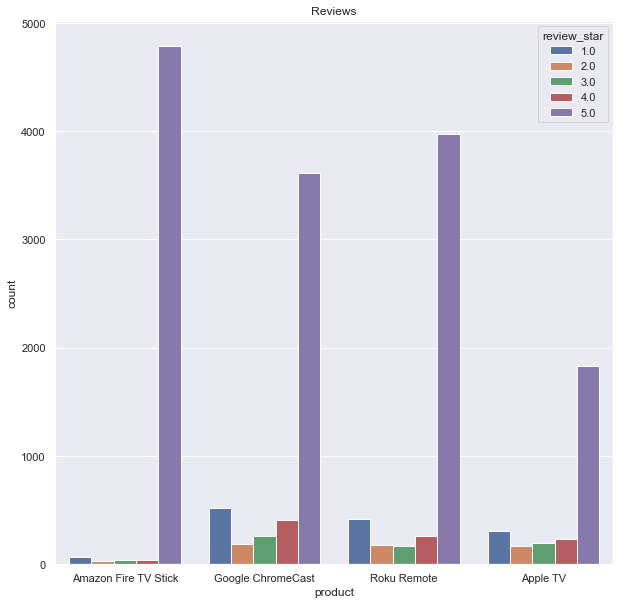

In [20]:
#Visualize the distribution of ratings given by product 
sns.countplot(x='product',hue='review_star',data=df)
sns.set(rc={'figure.figsize':(15,10)})
plt.title("Reviews")

Text(0.5, 1.0, 'Reviews')

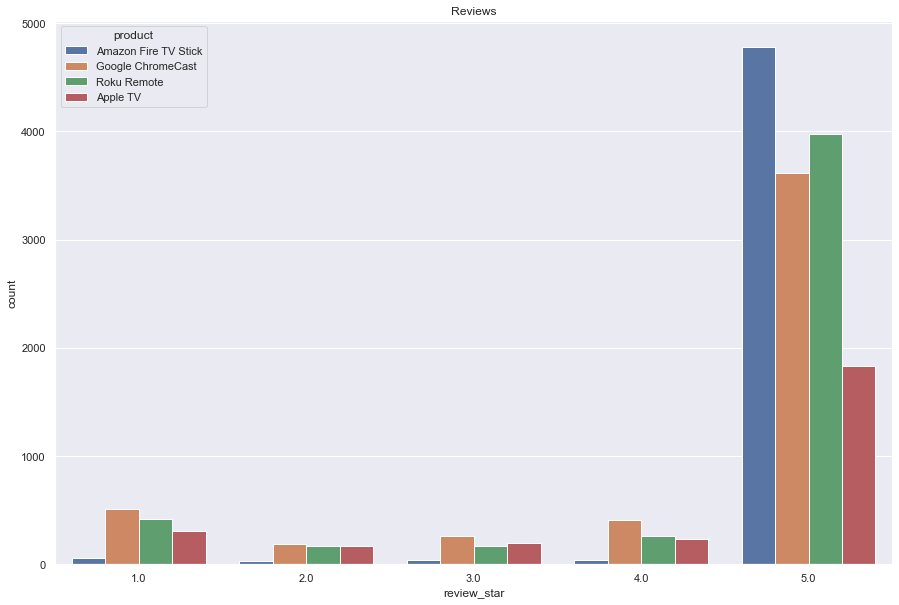

In [21]:
#Visualize the distribution of product given review rating
sns.countplot(x='review_star',hue='product',data=df)
sns.set(rc={'figure.figsize':(15,10)})
plt.title("Reviews")

In [27]:
# Review variation by product

# Groupby by product
product = df.groupby("product")

# Summary statistic of all products
product.describe().head()

review_star                                               \
                           count      mean       std  min  25%  50%  75%  max   
product                                                                         
Amazon Fire TV Stick      4959.0  4.906231  0.538063  1.0  5.0  5.0  5.0  5.0   
Apple TV                  2740.0  4.131022  1.411625  1.0  4.0  5.0  5.0  5.0   
Google ChromeCast         4997.0  4.286172  1.332056  1.0  4.0  5.0  5.0  5.0   
Roku Remote               5000.0  4.439400  1.237996  1.0  5.0  5.0  5.0  5.0   

                        page              ... review_len          word_count  \
                       count        mean  ...        75%      max      count   
product                                   ...                                  
Amazon Fire TV Stick  4959.0  249.519056  ...     131.00   7221.0     4959.0   
Apple TV              2740.0  137.500000  ...     310.75  10046.0     2740.0   
Google ChromeCast     4997.0  250.570342  ...     173.00   4725.0     4997.0   
Roku Remote           5000.0  250.500000  ...     397.00   5391.0     5000.0   

                                                                           
                           mean        std  min   25%   50%   75%     max  
product                                                                    
Amazon Fire TV Stick  24.000202  42.383607  1.0   5.0  11.0  25.0  1392.0  
Apple TV              51.640876  89.627159  1.0   8.0  23.0  59.0  1766.0  
Google ChromeCast     27.480889  42.578377  1.0   5.0  13.0  33.0   836.0  
Roku Remote           56.690400  70.394540  1.0  12.0  36.0  75.0  1030.0  

[4 rows x 40 columns]

In [28]:
product.mean().sort_values(by="review_star",ascending=False).head()

,review_star,page,polarity,review_len,word_count
product,,,,,
Amazon Fire TV Stick,4.906231,249.519056,0.333191,127.376689,24.000202
Roku Remote,4.439400,250.500000,0.289960,302.868000,56.690400
Google ChromeCast,4.286172,250.570342,0.295959,146.633580,27.480889
Apple TV,4.131022,137.500000,0.262013,277.747080,51.640876


In [30]:
# Create a text 
all_text = " ".join(review for review in df.review_text)
print ("There are {} words in the combination of all review.".format(len(all_text)))

There are 3657451 words in the combination of all review.


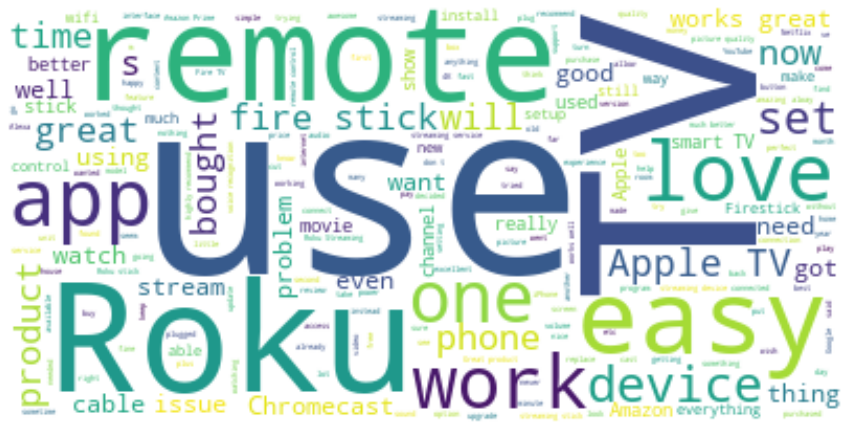

In [32]:
# Generate a word cloud image
wordcloud = WordCloud( background_color="white").generate(all_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 636619 words in the combination of all review.


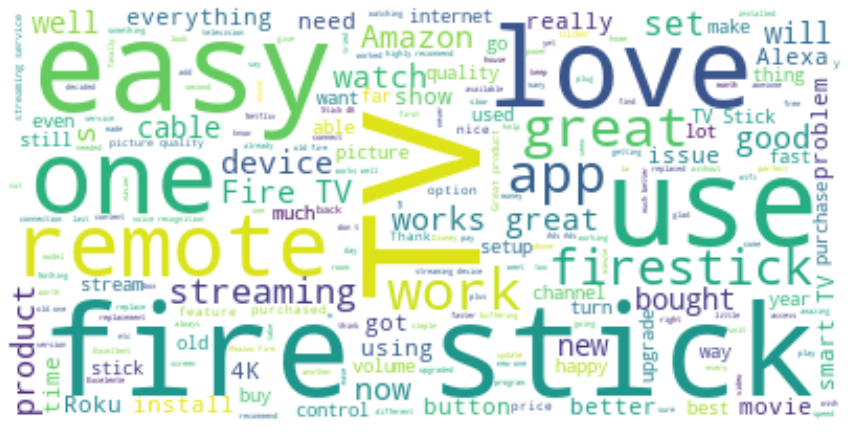

In [49]:
# Create a word cloud for amazon product
amazon = ['Amazon Fire TV Stick']
amazon_reviews = df[df['product'].isin(amazon)]
amazon_text = " ".join(review for review in amazon_reviews.review_text)
print ("There are {} words in the combination of all review.".format(len(amazon_text)))

# Generate a word cloud image
wordcloud = WordCloud( background_color="white").generate(amazon_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Reviews')

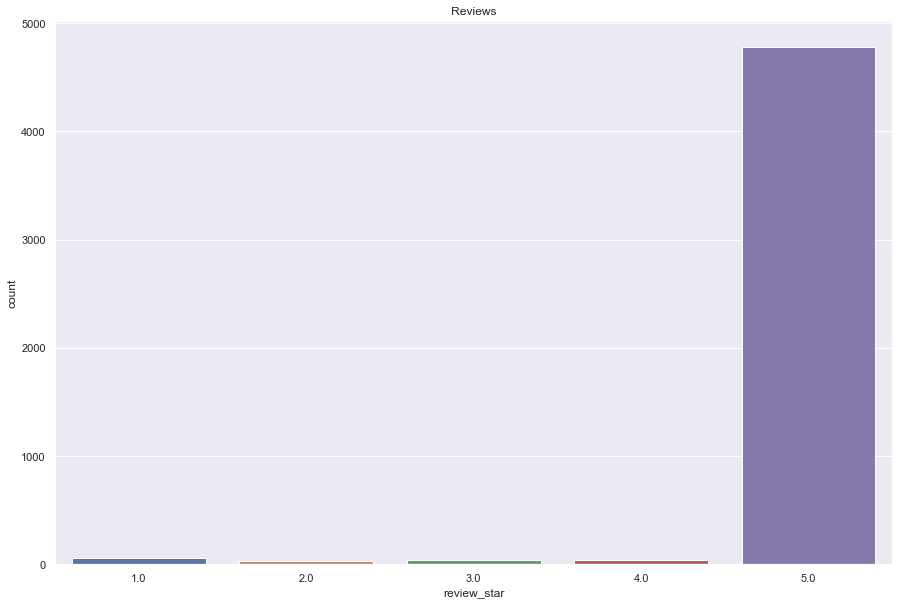

In [50]:
#Visualize the distribution of ratings given by product 
sns.countplot(x='review_star',data=amazon_reviews)
sns.set(rc={'figure.figsize':(15,10)})
plt.title("Reviews")

There are 763766 words in the combination of all review.


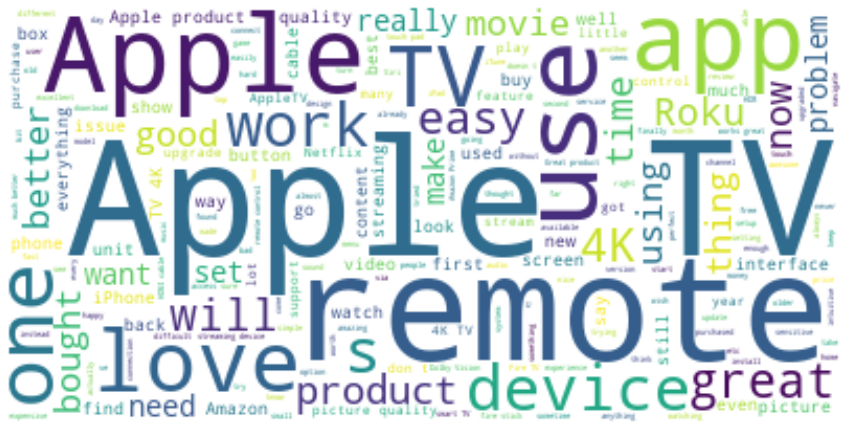

In [46]:
# Create a word cloud for apple product
apple = ['Apple TV']
apple_reviews = df[df['product'].isin(apple)]
apple_text = " ".join(review for review in apple_reviews.review_text)
print ("There are {} words in the combination of all review.".format(len(apple_text)))

# Generate a word cloud image
wordcloud = WordCloud( background_color="white").generate(apple_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Reviews')

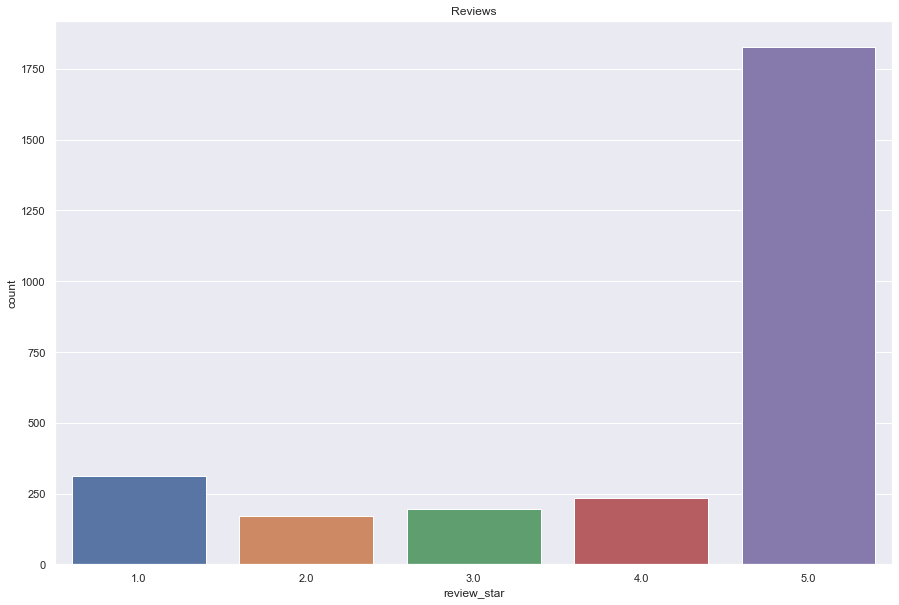

In [51]:
#Visualize the distribution of ratings given by product 
sns.countplot(x='review_star',data=apple_reviews)
sns.set(rc={'figure.figsize':(15,10)})
plt.title("Reviews")

There are 737724 words in the combination of all review.


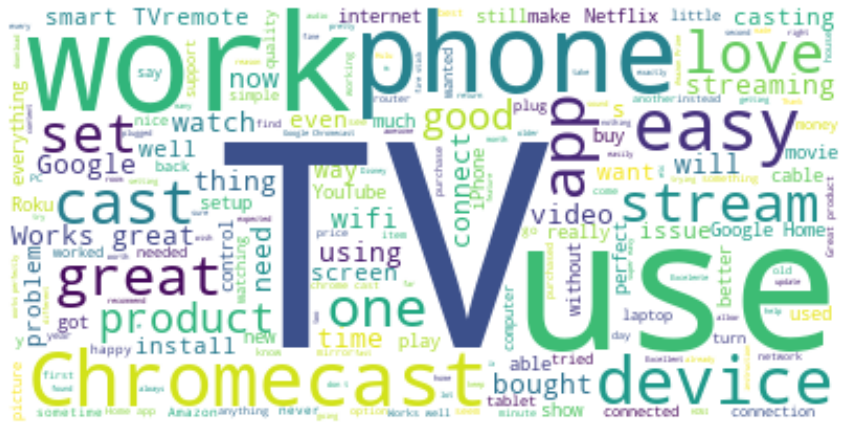

In [47]:
# Create a word cloud for google product
google = ['Google ChromeCast']
google_reviews = df[df['product'].isin(google)]
google_text = " ".join(review for review in google_reviews.review_text)
print ("There are {} words in the combination of all review.".format(len(google_text)))

# Generate a word cloud image
wordcloud = WordCloud( background_color="white").generate(google_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Reviews')

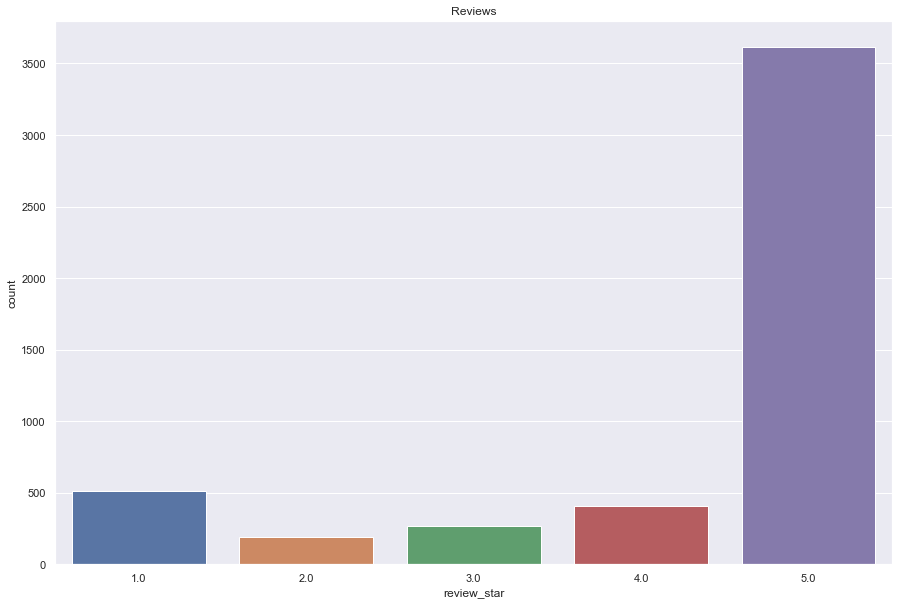

In [52]:
#Visualize the distribution of ratings given by product 
sns.countplot(x='review_star',data=google_reviews)
sns.set(rc={'figure.figsize':(15,10)})
plt.title("Reviews")

There are 1519339 words in the combination of all review.


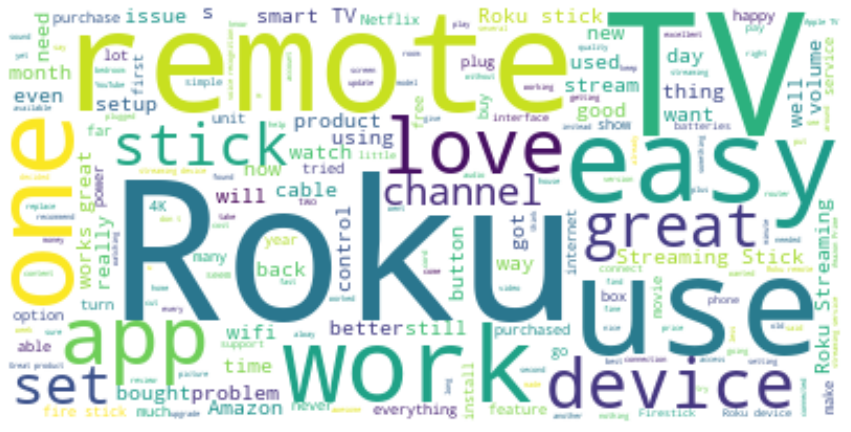

In [48]:
# Create a word cloud for roku product
roku = ['Roku Remote']
roku_reviews = df[df['product'].isin(roku)]
roku_text = " ".join(review for review in roku_reviews.review_text)
print ("There are {} words in the combination of all review.".format(len(roku_text)))

# Generate a word cloud image
wordcloud = WordCloud( background_color="white").generate(roku_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Reviews')

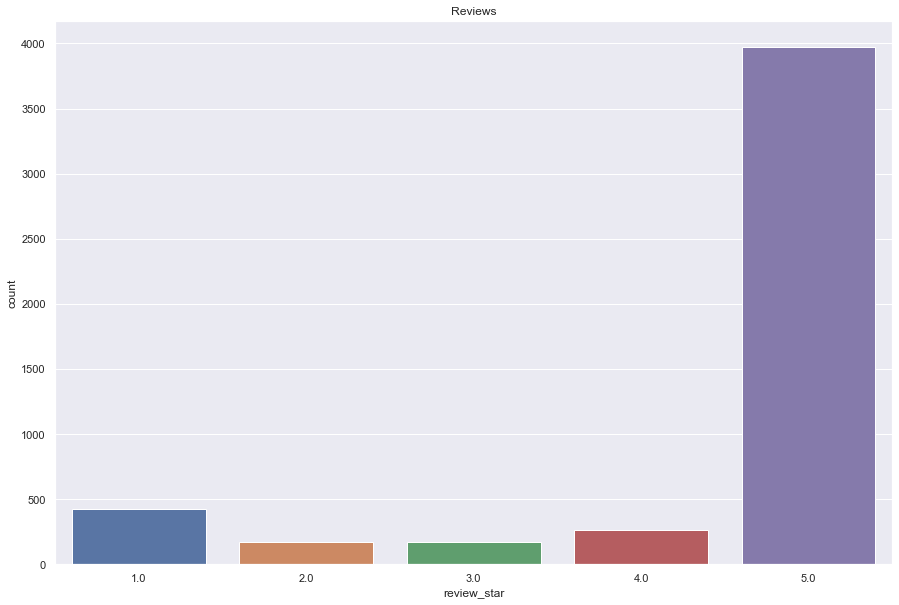

In [53]:
#Visualize the distribution of ratings given by product 
sns.countplot(x='review_star',data=roku_reviews)
sns.set(rc={'figure.figsize':(15,10)})
plt.title("Reviews")